<span style="color:gray">Интеллектуальный анализ данных в R и Python. Семинар 3</span>

### Работа с данными в Python. Pandas 

---

Ниже приведено описание возможностей библиотек <font color='blue'>Pandas</font> для подготовки, обработки и анализа данных.

<img src="pandas_2.PDF" width="800">

<img src="pandas_1-1.PDF" width="800">

<img src="pandas_1-2.PDF" width="800">

<font color='green'>Задание для самостоятельной работы:</font>
    
1. Создать ячейку в данном Jupyter Notebook и повторить операции, приведенные выше.  
1. Загрузить результирующий .ipynb файл в папку /assignments/. Файлы должны именоваться как:<br>
   *'Seminar_3_' + surname*.

---

<font color='gray'>Дополнительные ссылки:</font>
* SDSS 2016 - Day 1: [https://github.com/SSDS2016/Day-1](https://github.com/SSDS2016/Day-1)
* pandas CookBook: [http://pandas.pydata.org/pandas-docs/stable/tutorials.html](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
* Python Data Science Handbook, [https://github.com/jakevdp/PythonDataScienceHandbook]( https://github.com/jakevdp/PythonDataScienceHandbook)
* Learning Pandas, [https://github.com/PacktPublishing/Learning-Pandas-Second-Edition](https://github.com/PacktPublishing/Learning-Pandas-Second-Edition)

In [2]:
import pandas as pd

### Pandas Data Structures

In [3]:
s = pd.Series([0xF2, -2, 11, 42], index=['a', 'b', 'c', 'd'])
s

a    242
b     -2
c     11
d     42
dtype: int64

In [4]:
data = {'Store': ['Citilink', 'DNS', 'Eldorado'],
'Location': ['TC \'Empire\'', 'TC \'Rus\'\'', 'TC\'Moskovsky\''],
'Price_Mark_Percent': [90, 85, 70]}
df = pd.DataFrame(data,
columns=['Store', 'Location', 'Price Mark Percent'])
data

{'Store': ['Citilink', 'DNS', 'Eldorado'],
 'Location': ["TC 'Empire'", "TC 'Rus''", "TC'Moskovsky'"],
 'Price_Mark_Percent': [90, 85, 70]}

### I/O

In [5]:
csv_nums = pd.read_csv('file.csv', header=None, nrows=2)
csv_nums

,0
0,222312
1,754655


In [6]:
df.to_csv('myDataFrame.csv')

In [7]:
exc = pd.read_excel('excel.xls')
exc

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [8]:
df1 = pd.DataFrame([['a', 'b'], ['c', 'd']],
                    index=['row 1', 'row 2'],
                    columns=['col 1', 'col 2'])
df1.to_excel("output.xlsx") 

ModuleNotFoundError: No module named 'openpyxl'

In [11]:
xlsx = pd.ExcelFile('excel.xls')
dff = pd.read_excel(xlsx, 'Sheet 1')
dff

,12,2,5,7
0,1,2,4,2


In [15]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
pd.read_sql("SELECT * FROM my_table;", engine)
pd.read_sql_table('my_table', engine)
pd.read_sql_query("SELECT * FROM my_table;", engine)

OperationalError: (sqlite3.OperationalError) no such table: my_table
[SQL: SELECT * FROM my_table;]
(Background on this error at: http://sqlalche.me/e/e3q8)

In [17]:
pd.to_sql('myDf', engine)

AttributeError: module 'pandas' has no attribute 'to_sql'

### Asking For Help

In [18]:
help(pd.Series.loc)

Help on property:

    Access a group of rows and columns by label(s) or a boolean array.
    
    ``.loc[]`` is primarily label based, but may also be used with a
    boolean array.
    
    Allowed inputs are:
    
    - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
      interpreted as a *label* of the index, and **never** as an
      integer position along the index).
    - A list or array of labels, e.g. ``['a', 'b', 'c']``.
    - A slice object with labels, e.g. ``'a':'f'``.
    
      .. warning:: Note that contrary to usual python slices, **both** the
          start and the stop are included
    
    - A boolean array of the same length as the axis being sliced,
      e.g. ``[True, False, True]``.
    - A ``callable`` function with one argument (the calling Series or
      DataFrame) and that returns valid output for indexing (one of the above)
    
    See more at :ref:`Selection by Label <indexing.label>`
    
    Raises
    ------
    KeyError:
        when any

### Selection

In [19]:
s['b']

-2

In [20]:
df[1:]

,Store,Location,Price Mark Percent
1,DNS,TC 'Rus'',NaN
2,Eldorado,TC'Moskovsky',NaN


In [21]:
df.iloc[[0],[0]]

,Store
0,Citilink


In [23]:
df.loc[[0], ['Store']]

,Store
0,Citilink


In [27]:
df.at([0], ['Location'])

TypeError: __call__() takes from 1 to 2 positional arguments but 3 were given

In [28]:
df.ix[2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Store                      Eldorado
Location              TC'Moskovsky'
Price Mark Percent              NaN
Name: 2, dtype: object

In [42]:
df.ix[:,'Location']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0      TC 'Empire'
1        TC 'Rus''
2    TC'Moskovsky'
Name: Location, dtype: object

In [30]:
df.ix[1,'Store']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


'DNS'

In [31]:
s[~(s > 1)]

b   -2
dtype: int64

In [32]:
s[(s < -1) | (s > 2)]

a    242
b     -2
c     11
d     42
dtype: int64

In [38]:
df[df['Location'] == 'TC\'Moskovsky\'']

,Store,Location,Price Mark Percent
2,Eldorado,TC'Moskovsky',NaN


In [39]:
s['a'] = 6

### Dropping

In [40]:
s.drop(['a', 'c'])

b    -2
d    42
dtype: int64

In [43]:
df.drop('Location', axis=1)

,Store,Price Mark Percent
0,Citilink,NaN
1,DNS,NaN
2,Eldorado,NaN


### Sort & Rank

In [44]:
df.sort_index()

,Store,Location,Price Mark Percent
0,Citilink,TC 'Empire',NaN
1,DNS,TC 'Rus'',NaN
2,Eldorado,TC'Moskovsky',NaN


In [46]:
df.sort_values(by='Store')

,Store,Location,Price Mark Percent
0,Citilink,TC 'Empire',NaN
1,DNS,TC 'Rus'',NaN
2,Eldorado,TC'Moskovsky',NaN


In [47]:
df.rank()

,Store,Location,Price Mark Percent
0,1.0,1.0,NaN
1,2.0,2.0,NaN
2,3.0,3.0,NaN


### Retrieving Series/DataFrame Information

In [48]:
df.shape

(3, 3)

In [49]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [50]:
df.columns

Index(['Store', 'Location', 'Price Mark Percent'], dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Store                 3 non-null object
Location              3 non-null object
Price Mark Percent    0 non-null object
dtypes: object(3)
memory usage: 200.0+ bytes


In [52]:
df.count()

Store                 3
Location              3
Price Mark Percent    0
dtype: int64

In [53]:
df.sum()

Store                               CitilinkDNSEldorado
Location              TC 'Empire'TC 'Rus''TC'Moskovsky'
Price Mark Percent                                    0
dtype: object

In [54]:
df.cumsum()

,Store,Location,Price Mark Percent
0,Citilink,TC 'Empire',NaN
1,CitilinkDNS,TC 'Empire'TC 'Rus'',NaN
2,CitilinkDNSEldorado,TC 'Empire'TC 'Rus''TC'Moskovsky',NaN


In [55]:
df.min() 

Store                    Citilink
Location              TC 'Empire'
Price Mark Percent           None
dtype: object

In [56]:
df.describe()

,Store,Location,Price Mark Percent
count,3,3,0
unique,3,3,0
top,Citilink,TC 'Rus'',NaN
freq,1,1,NaN


In [57]:
df.mean() 

Series([], dtype: float64)

In [58]:
df.median() 

/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Series([], dtype: float64)

### Applying Functions

In [59]:
f = lambda x: x*2
df.apply(f) 

,Store,Location,Price Mark Percent
0,CitilinkCitilink,TC 'Empire'TC 'Empire',NaN
1,DNSDNS,TC 'Rus''TC 'Rus'',NaN
2,EldoradoEldorado,TC'Moskovsky'TC'Moskovsky',NaN


In [60]:
df.applymap(f)

,Store,Location,Price Mark Percent
0,CitilinkCitilink,TC 'Empire'TC 'Empire',NaN
1,DNSDNS,TC 'Rus''TC 'Rus'',NaN
2,EldoradoEldorado,TC'Moskovsky'TC'Moskovsky',NaN


### Data Alignment

In [61]:
s3 = pd.Series([7, -2, 3], index=['a', 'c', 'd'])
s + s3

a    13.0
b     NaN
c     9.0
d    45.0
dtype: float64

In [62]:
s.add(s3, fill_value=0)

a    13.0
b    -2.0
c     9.0
d    45.0
dtype: float64

In [63]:
s.sub(s3, fill_value=2)

a    -1.0
b    -4.0
c    13.0
d    39.0
dtype: float64

In [64]:
s.div(s3, fill_value=4)

a     0.857143
b    -0.500000
c    -5.500000
d    14.000000
dtype: float64

In [65]:
s.mul(s3, fill_value=3)

a     42.0
b     -6.0
c    -22.0
d    126.0
dtype: float64

# Syntax – Creating DataFrames

In [69]:
df = pd.DataFrame(
{"a" : [11 ,22, 33],
"b" : [23, 18, 19],
"c" : [11, 1, 24]},
index = [1, 2, 3])
df


df2 = pd.DataFrame(
{"a" : [12 ,13, 14],
"b" : [71, 82, 29],
"c" : [12, 21, 22]},
index = [1, 2, 3])
df1 = pd.DataFrame(
{"d" : [1 ,1, 11],
"e" : [2, 1, 3],
"f" : [1, 112, 11]},
index = [4, 5, 6])

In [67]:
df = pd.DataFrame(
[[4, 7, 10],
[5, 8, 11],
[6, 9, 12]],
index=[1, 2, 3],
columns=['a', 'b', 'c'])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [70]:
df = pd.DataFrame(
{"a" : [1 ,3, 5],
"b" : [7, 9, 11],
"c" : [13, 15, 17]},
index = pd.MultiIndex.from_tuples(
[('d',1),('d',2),('e',2)],
names=['n','v']))
df

a   b   c
n v           
d 1  1   7  13
  2  3   9  15
e 2  5  11  17

## Method Chaining

In [71]:
df = (pd.melt(df)
.rename(columns={
'variable' : 'var',
'value' : 'val'})
.query('val >= 200')
)

In [72]:
df

,var,val


## Reshaping Data – Change the layout of a data set

In [73]:
pd.melt(df)

,variable,value


In [74]:
pd.concat([df1,df2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,a,b,c,d,e,f
4,NaN,NaN,NaN,1.0,2.0,1.0
5,NaN,NaN,NaN,1.0,1.0,112.0
6,NaN,NaN,NaN,11.0,3.0,11.0
1,12.0,71.0,12.0,NaN,NaN,NaN
2,13.0,82.0,21.0,NaN,NaN,NaN
3,14.0,29.0,22.0,NaN,NaN,NaN


In [115]:
df = pd.concat([df1,df2], axis=1)
df 

,d,e,f,a,b,c
1,NaN,NaN,NaN,12.0,71.0,12.0
2,NaN,NaN,NaN,13.0,82.0,21.0
3,NaN,NaN,NaN,14.0,29.0,22.0
4,1.0,2.0,1.0,NaN,NaN,NaN
5,1.0,1.0,112.0,NaN,NaN,NaN
6,11.0,3.0,11.0,NaN,NaN,NaN


In [116]:
df.sort_values('b')

,d,e,f,a,b,c
3,NaN,NaN,NaN,14.0,29.0,22.0
1,NaN,NaN,NaN,12.0,71.0,12.0
2,NaN,NaN,NaN,13.0,82.0,21.0
4,1.0,2.0,1.0,NaN,NaN,NaN
5,1.0,1.0,112.0,NaN,NaN,NaN
6,11.0,3.0,11.0,NaN,NaN,NaN


In [117]:
df.rename(columns = {'a':'alpha'})

,d,e,f,alpha,b,c
1,NaN,NaN,NaN,12.0,71.0,12.0
2,NaN,NaN,NaN,13.0,82.0,21.0
3,NaN,NaN,NaN,14.0,29.0,22.0
4,1.0,2.0,1.0,NaN,NaN,NaN
5,1.0,1.0,112.0,NaN,NaN,NaN
6,11.0,3.0,11.0,NaN,NaN,NaN


In [118]:
df.sort_index()

,d,e,f,a,b,c
1,NaN,NaN,NaN,12.0,71.0,12.0
2,NaN,NaN,NaN,13.0,82.0,21.0
3,NaN,NaN,NaN,14.0,29.0,22.0
4,1.0,2.0,1.0,NaN,NaN,NaN
5,1.0,1.0,112.0,NaN,NaN,NaN
6,11.0,3.0,11.0,NaN,NaN,NaN


In [119]:
df.reset_index()

,index,d,e,f,a,b,c
0,1,NaN,NaN,NaN,12.0,71.0,12.0
1,2,NaN,NaN,NaN,13.0,82.0,21.0
2,3,NaN,NaN,NaN,14.0,29.0,22.0
3,4,1.0,2.0,1.0,NaN,NaN,NaN
4,5,1.0,1.0,112.0,NaN,NaN,NaN
5,6,11.0,3.0,11.0,NaN,NaN,NaN


In [120]:
df.drop(columns=['a'])

,d,e,f,b,c
1,NaN,NaN,NaN,71.0,12.0
2,NaN,NaN,NaN,82.0,21.0
3,NaN,NaN,NaN,29.0,22.0
4,1.0,2.0,1.0,NaN,NaN
5,1.0,1.0,112.0,NaN,NaN
6,11.0,3.0,11.0,NaN,NaN


## Subset Observations (Rows)

In [121]:
df.drop_duplicates()

,d,e,f,a,b,c
1,NaN,NaN,NaN,12.0,71.0,12.0
2,NaN,NaN,NaN,13.0,82.0,21.0
3,NaN,NaN,NaN,14.0,29.0,22.0
4,1.0,2.0,1.0,NaN,NaN,NaN
5,1.0,1.0,112.0,NaN,NaN,NaN
6,11.0,3.0,11.0,NaN,NaN,NaN


In [122]:
df.head(2)

,d,e,f,a,b,c
1,NaN,NaN,NaN,12.0,71.0,12.0
2,NaN,NaN,NaN,13.0,82.0,21.0


In [123]:
df.tail(2)

,d,e,f,a,b,c
5,1.0,1.0,112.0,NaN,NaN,NaN
6,11.0,3.0,11.0,NaN,NaN,NaN


In [124]:
df.sample(frac=0.5)

,d,e,f,a,b,c
4,1.0,2.0,1.0,NaN,NaN,NaN
6,11.0,3.0,11.0,NaN,NaN,NaN
2,NaN,NaN,NaN,13.0,82.0,21.0


In [125]:
df.sample(n=2)

,d,e,f,a,b,c
1,NaN,NaN,NaN,12.0,71.0,12.0
3,NaN,NaN,NaN,14.0,29.0,22.0


In [126]:
df.iloc[10:20]

,d,e,f,a,b,c


In [129]:
df.nlargest(2,'a')

,d,e,f,a,b,c
3,NaN,NaN,NaN,14.0,29.0,22.0
2,NaN,NaN,NaN,13.0,82.0,21.0


In [130]:
df.nsmallest(1, 'a')

,d,e,f,a,b,c
1,NaN,NaN,NaN,12.0,71.0,12.0


## Subset Variables (Columns)

In [131]:
df[['a','b']]

,a,b
1,12.0,71.0
2,13.0,82.0
3,14.0,29.0
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN


In [132]:
df['a']

1    12.0
2    13.0
3    14.0
4     NaN
5     NaN
6     NaN
Name: a, dtype: float64

In [135]:
df.loc[:,'a':'d']

""
1
2
3
4
5
6


In [136]:
df.loc[df['a'] > 10, ['a','c']]

,a,c
1,12.0,12.0
2,13.0,21.0
3,14.0,22.0


## Summarize Data

In [137]:
df['a'].value_counts()

14.0    1
13.0    1
12.0    1
Name: a, dtype: int64

In [138]:
len(df)

6

In [139]:
df['a'].nunique()

3

In [140]:
df.describe()

,d,e,f,a,b,c
count,3.000000,3.0,3.000000,3.0,3.000000,3.000000
mean,4.333333,2.0,41.333333,13.0,60.666667,18.333333
std,5.773503,1.0,61.403040,1.0,27.970222,5.507571
min,1.000000,1.0,1.000000,12.0,29.000000,12.000000
25%,1.000000,1.5,6.000000,12.5,50.000000,16.500000
50%,1.000000,2.0,11.000000,13.0,71.000000,21.000000
75%,6.000000,2.5,61.500000,13.5,76.500000,21.500000
max,11.000000,3.0,112.000000,14.0,82.000000,22.000000


In [141]:
df.sum()

d     13.0
e      6.0
f    124.0
a     39.0
b    182.0
c     55.0
dtype: float64

In [142]:
df.count()

d    3
e    3
f    3
a    3
b    3
c    3
dtype: int64

In [143]:
df.median()

d     1.0
e     2.0
f    11.0
a    13.0
b    71.0
c    21.0
dtype: float64

In [144]:
df.min()

d     1.0
e     1.0
f     1.0
a    12.0
b    29.0
c    12.0
dtype: float64

## Group Data

In [145]:
gr = df.groupby(by="a")

In [146]:
gr.size()

a
12.0    1
13.0    1
14.0    1
dtype: int64

In [147]:
gr.rank(method='dense')

,d,e,f,b,c
1,NaN,NaN,NaN,1.0,1.0
2,NaN,NaN,NaN,1.0,1.0
3,NaN,NaN,NaN,1.0,1.0
4,1.0,2.0,1.0,NaN,NaN
5,1.0,1.0,3.0,NaN,NaN
6,2.0,3.0,2.0,NaN,NaN


In [148]:
gr.cumsum()

,d,e,f,b,c
1,NaN,NaN,NaN,71.0,12.0
2,NaN,NaN,NaN,82.0,21.0
3,NaN,NaN,NaN,29.0,22.0
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN


## Windows

In [149]:
o1 = df.expanding()

In [150]:
o2 = df.expanding()

## Plotting

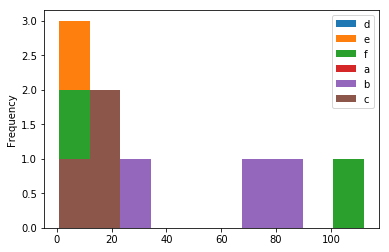

In [151]:
df.plot.hist()

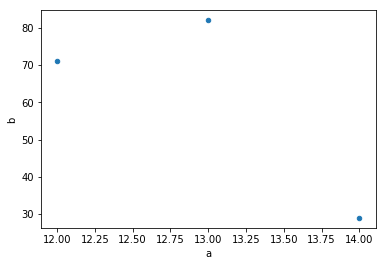

In [152]:
df.plot.scatter(x='a',y='b')

## Handling Missing Data

In [153]:
df.dropna()

,d,e,f,a,b,c


## Make New Columns

In [163]:
df.assign(Area=lambda df: df.Length*df.Height)

AttributeError: 'DataFrame' object has no attribute 'H'

In [159]:
df['Volume'] = df.Length*df.Height*df.Depth

AttributeError: 'DataFrame' object has no attribute 'Length'

In [164]:
pd.qcut(df.col, n, labels=False)

AttributeError: 'DataFrame' object has no attribute 'col'

In [165]:
df.max(axis=1)

1     71.0
2     82.0
3     29.0
4      2.0
5    112.0
6     11.0
dtype: float64

In [166]:
df.abs()

,d,e,f,a,b,c
1,NaN,NaN,NaN,12.0,71.0,12.0
2,NaN,NaN,NaN,13.0,82.0,21.0
3,NaN,NaN,NaN,14.0,29.0,22.0
4,1.0,2.0,1.0,NaN,NaN,NaN
5,1.0,1.0,112.0,NaN,NaN,NaN
6,11.0,3.0,11.0,NaN,NaN,NaN


## Combine Data Sets

In [171]:
adf = pd.DataFrame(
{"x1" : ["Note1", "Note2", "Note3"],
"x2" : [1, 2, 3]})
bdf = pd.DataFrame(
{"x1" : ["NoteA", "NoteB", "NoteX"],
"x3" : ["NoteG", "NoteE", "NoteZ"]})
adf

,x1,x2
0,Note1,1
1,Note2,2
2,Note3,3


In [172]:
bdf

,x1,x3
0,NoteA,NoteG
1,NoteB,NoteE
2,NoteX,NoteZ


In [173]:
pd.merge(adf, bdf,
how='left', on='x1')

,x1,x2,x3
0,Note1,1,NaN
1,Note2,2,NaN
2,Note3,3,NaN


In [174]:
pd.merge(adf, bdf,
how='right', on='x1')

,x1,x2,x3
0,NoteA,NaN,NoteG
1,NoteB,NaN,NoteE
2,NoteX,NaN,NoteZ


In [175]:
pd.merge(adf, bdf,
how='inner', on='x1')

,x1,x2,x3


In [176]:
pd.merge(adf, bdf,
how='outer', on='x1')

,x1,x2,x3
0,Note1,1.0,NaN
1,Note2,2.0,NaN
2,Note3,3.0,NaN
3,NoteA,NaN,NoteG
4,NoteB,NaN,NoteE
5,NoteX,NaN,NoteZ


In [177]:
adf[adf.x1.isin(bdf.x1)]

,x1,x2


In [178]:
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
0,Note1,1
1,Note2,2
2,Note3,3


In [179]:
ydf = pd.DataFrame(
{"x1" : ["A", "B", "C"],
"x2" : [1, 2, 3]})
zdf = pd.DataFrame(
{"x1" : ["B", "C", "D"],
"x3" : [2,3,4]})
zdf

,x1,x3
0,B,2
1,C,3
2,D,4


In [180]:
pd.merge(ydf, zdf)

,x1,x2,x3
0,B,2,2
1,C,3,3


In [181]:
pd.merge(ydf, zdf, how='outer')

,x1,x2,x3
0,A,1.0,NaN
1,B,2.0,2.0
2,C,3.0,3.0
3,D,NaN,4.0


In [182]:
pd.merge(ydf, zdf, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

,x1,x2,x3
0,A,1.0,NaN
